### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

carteira = pd.read_excel("Carteira.xlsx")
carteira = carteira.drop(8)
carteira = carteira.drop(13)
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,NTCO3,Ação,100
10,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [3]:
cotacao_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacao_carteira[ativo] = yf.download(f"{ativo}.SA", start='2020-01-01', end='2020-11-10')['Adj Close']

display(cotacao_carteira)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11
Date,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,24.093071,33.508640,10.9650,17.084028,17.499079,38.093487,106.067291,133.360336,178.510529
2020-01-03,113.800003,140.899994,11.922436,24.105257,33.156185,11.0675,17.537741,17.549858,40.747009,107.336502,131.570267,178.510529
2020-01-06,112.589996,139.100006,11.932189,23.674688,32.662777,11.3500,17.602497,17.524467,39.882378,106.495956,132.966492,177.061707
2020-01-07,112.239998,139.399994,11.898048,23.263407,31.905012,11.2650,17.567362,17.594387,40.528366,106.638855,128.733017,177.750366
2020-01-08,111.949997,138.199997,12.263844,22.903526,31.385160,11.2125,17.655201,17.438459,40.737072,104.705612,124.830612,167.689011
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,14.883231,21.663549,13.8050,15.907246,16.697002,46.143505,90.349251,112.058456,141.592163
2020-11-04,94.160004,112.000000,26.143793,14.775323,22.528645,14.4000,16.284946,17.603659,47.375851,90.357651,113.642700,141.645828
2020-11-05,96.949997,115.900002,27.401571,15.003958,23.060329,14.6775,17.233582,18.381460,49.969746,90.357651,114.904709,141.466919


### Será que todos os dados vieram corretos?

In [4]:
cotacao_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
dtypes: float64(12)
memory usage: 21.7 KB


### Ajustando os dados

In [5]:
cotacao_carteira = cotacao_carteira.ffill() ## prencheu as linhas vazias com os valores da linha anterior

#  OU

# df_media = cotacao_carteira.mean
# cotacao_carteira = cotacao_carteira.fillna(df_media) ## preencheu as linhas da tabela com os valores da média total

cotacao_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
dtypes: float64(12)
memory usage: 21.7 KB


### Vamos ver como que as ações foram individualmente

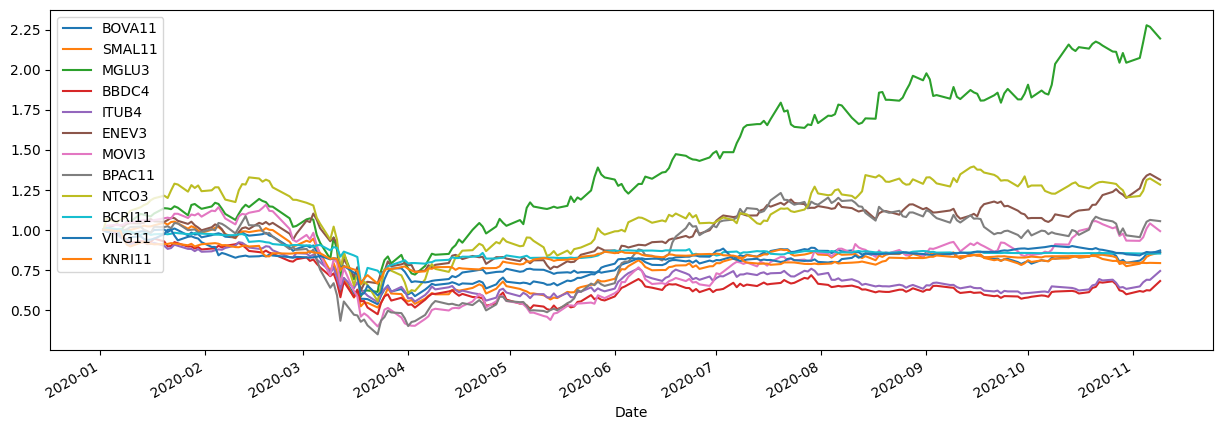

In [6]:
# # Converter a coluna para float
# cotacao_carteira['XPLG11'] = pd.to_numeric(cotacao_carteira['XPLG11'], errors='coerce')

cota_normalizada = cotacao_carteira / cotacao_carteira.iloc[0]

cota_normalizada.plot(figsize = (15,5))
plot.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [7]:
data_inicio = "2020-01-01"
data_fim = "2020-11-10"
simbolo = "^BVSP"  # Índice Bovespa

# Buscar os dados
cotacao_ibov = yf.download(simbolo, start=data_inicio, end=data_fim)
display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


### Criando um dataframe da Carteira com as quantidades de ações

In [10]:
valor_investido = pd.DataFrame()

for ativo in carteira["Ativos"]:
    valor_investido[ativo] = cotacao_carteira[ativo] * carteira.loc[carteira["Ativos"]==ativo, "Qtde"].values[0]
    

valor_investido["Total"] = valor_investido.sum(axis=1)
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,Total
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.735565,2409.307098,3350.864029,3289.500046,1708.402824,1749.907875,3809.348679,10606.729126,13336.033630,17851.052856,95514.881516
2020-01-03,11380.000305,14089.999390,11922.435760,2410.525703,3315.618515,3320.250034,1753.774071,1754.985809,4074.700928,10733.650208,13157.026672,17851.052856,95764.020252
2020-01-06,11258.999634,13910.000610,11932.188988,2367.468834,3266.277695,3405.000114,1760.249710,1752.446747,3988.237762,10649.595642,13296.649170,17706.170654,95293.285561
2020-01-07,11223.999786,13939.999390,11898.048401,2326.340675,3190.501213,3379.500103,1756.736183,1759.438705,4052.836609,10663.885498,12873.301697,17775.036621,94839.624882
2020-01-08,11194.999695,13819.999695,12263.843536,2290.352631,3138.516045,3363.749886,1765.520096,1743.845940,4073.707199,10470.561218,12483.061218,16768.901062,93377.058220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1488.323116,2166.354942,4141.500092,1590.724564,1669.700241,4614.350510,9034.925079,11205.845642,14159.216309,95240.850544
2020-11-04,9416.000366,11200.000000,26143.793106,1477.532291,2252.864456,4319.999886,1628.494644,1760.365868,4737.585068,9035.765076,11364.270020,14164.582825,97501.253605
2020-11-05,9694.999695,11590.000153,27401.571274,1500.395775,2306.032944,4403.249931,1723.358154,1838.146019,4996.974564,9035.765076,11490.470886,14146.691895,100127.656364


### Comparação Carteira x IBOV

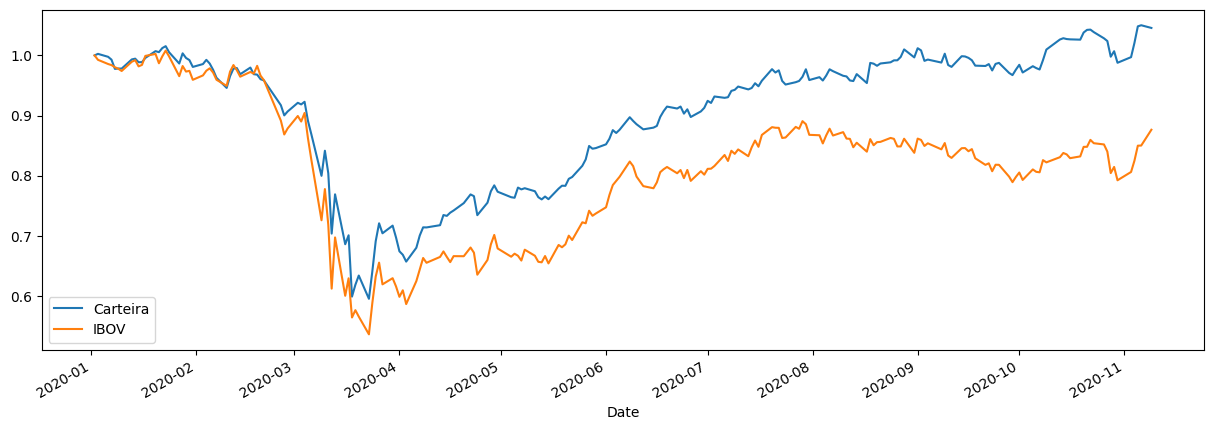

In [28]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
retorno_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm["Total"].plot(figsize=(15,5), label=("Carteira"))
retorno_ibov_norm["Adj Close"].plot(label=("IBOV"))
plot.legend()
plot.show()


In [27]:
retorno_carteira = valor_investido["Total"][-1] / valor_investido["Total"][0]
retorno_ibov = cotacao_ibov["Adj Close"][-1] / cotacao_ibov["Adj Close"][0]
print(f"Retorno da carteira: {retorno_carteira:.2%}")
print(f"Retorno IBOV: {retorno_ibov:.2%}")


Retorno da carteira: 104.57%
Retorno IBOV: 87.64%


### Correlação da Carteira com o IBOV

In [23]:
correlacao = valor_investido["Total"].corr(cotacao_ibov["Adj Close"])

print(f"{correlacao:.2%}")

87.01%
